# Семинар 4

## Задание 1
Задача 1
Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
Считать данные с помощью pandas
Вывести на экран первые 5 строк
1.1 Изучите количество памяти с помощью matplotlib

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


Изучите количество памяти с помощью mathplotlib

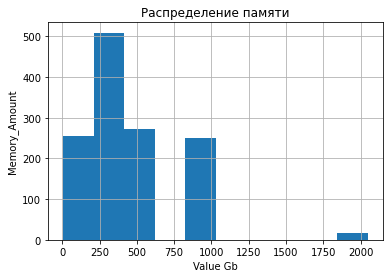

In [4]:
plt.hist(df['Memory_Amount'])
plt.xlabel('Value Gb')
plt.ylabel('Memory_Amount')
plt.title('Распределение памяти')
plt.grid();

Изучите стоимость ноутбуков с помощью mathplotlib

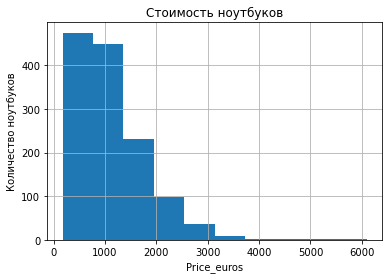

In [5]:
plt.hist(df['Price_euros'])
plt.xlabel('Price_euros')
plt.ylabel('Количество ноутбуков')
plt.title('Стоимость ноутбуков')
plt.grid();

Изучите вес ноутбуков

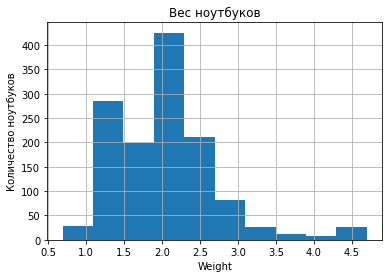

In [6]:
plt.hist(df['Weight'])
plt.xlabel('Weight')
plt.ylabel('Количество ноутбуков')
plt.title('Вес ноутбуков')
plt.grid();

# Задача 2

### 2.1 Изучите распределение типов носителя

Text(0.5, 1.0, 'Распределение типов носителя')

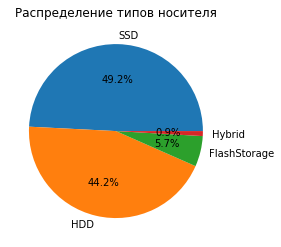

In [8]:
plt.pie(df['Memory_Type'].value_counts().values, autopct ='%1.1f%%', labels = df['Memory_Type'].value_counts().index);
plt.title('Распределение типов носителя');


2.2 Изучите распределение компаний производителей

In [11]:
company_names = df['Company'].value_counts()
index_values = company_names.values
index_names = company_names.index
company_names

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Fujitsu        3
Google         3
LG             3
Chuwi          3
Huawei         2
Name: Company, dtype: int64

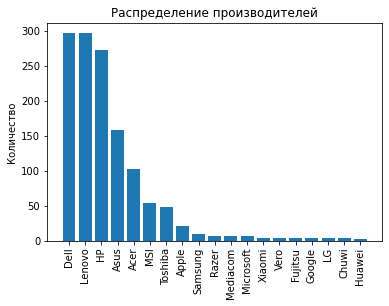

In [14]:
plt.bar(index_names, index_values)
plt.title('Распределение производителей')
plt.ylabel('Количество')
plt.xticks(rotation = 90);

2.3 Изучите распределение операционной системы

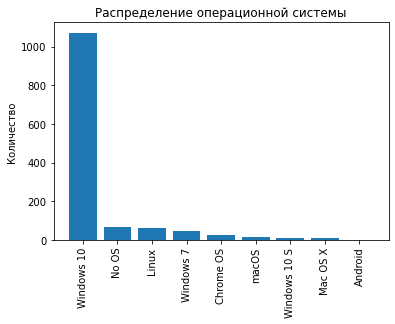

In [16]:
op_sys = df['OpSys'].value_counts()
index_val = op_sys.values
index_nam = op_sys.index

plt.bar(index_nam, index_val)
plt.title('Распределение операционной системы')
plt.ylabel('Количество')
plt.xticks(rotation = 90);

2.4 Изучите распределение компаний производителей CPU

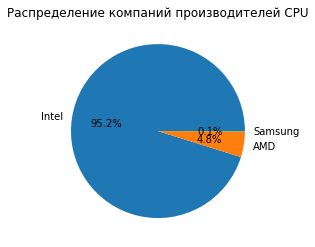

In [18]:
plt.pie(df['Cpu_Company'].value_counts().values, autopct ='%1.1f%%', labels = df['Cpu_Company'].value_counts().index);
plt.title('Распределение компаний производителей CPU');



# Задание 3

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

## 3.1 Постройте график в абсолютных величинах

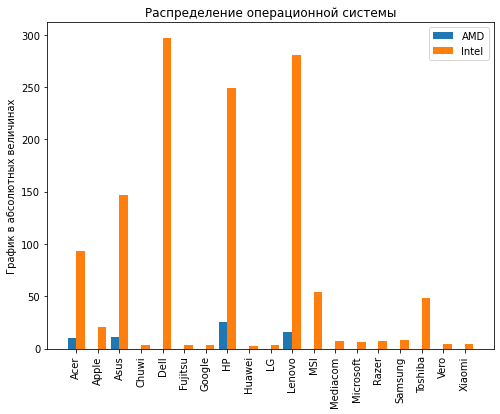

In [24]:
svod_no_samsung = pd.crosstab(index = df['Company'], columns = df['Cpu_Company'])
svod_no_samsung = svod_no_samsung.drop(columns = 'Samsung').reset_index()
svod_no_samsung

plt.figure(figsize = (8, 6))
end_ticks = np.arange(len(svod_no_samsung['AMD'])) #это длина
w = 0.4 #ширина
offset = 0.2                      
plt.bar(end_ticks - offset, svod_no_samsung['AMD'], width = w)
plt.bar(end_ticks + offset, svod_no_samsung['Intel'], width = w)
plt.title('Распределение операционной системы')
plt.ylabel('График в абсолютных величинах')
plt.legend(['AMD', 'Intel'])
plt.xticks(end_ticks, svod_no_samsung['Company'], rotation = 90);

## 3.2 Постройте график в относительных величинах

In [25]:
svod_no_samsung1 = pd.crosstab(index = df['Company'], columns = df['Cpu_Company'], normalize = 'index')
svod_no_samsung1 = svod_no_samsung1.drop(columns = 'Samsung').reset_index()
svod_no_samsung1


Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


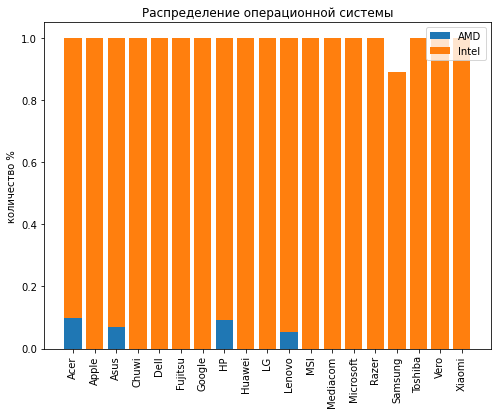

In [27]:
plt.figure(figsize = (8, 6))
                   
plt.bar(svod_no_samsung1['Company'], svod_no_samsung1['AMD'])
plt.bar(svod_no_samsung1['Company'], svod_no_samsung1['Intel'], bottom = svod_no_samsung1['AMD'])
plt.title('Распределение операционной системы')
plt.ylabel('количество %')
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation = 90);

# Задание 4

4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы


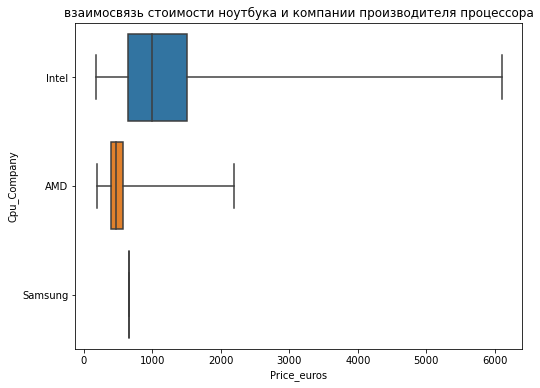

In [33]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = df['Price_euros'], y = df['Cpu_Company'], whis = 10)
plt.title('взаимосвязь стоимости ноутбука и компании производителя процессора');

4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

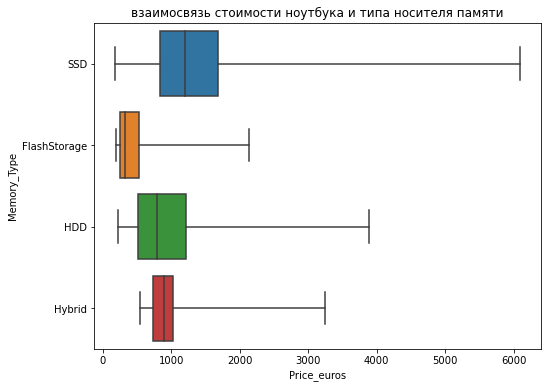

In [34]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = df['Price_euros'], y = df['Memory_Type'], whis = 10)
plt.title('взаимосвязь стоимости ноутбука и типа носителя памяти');

4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

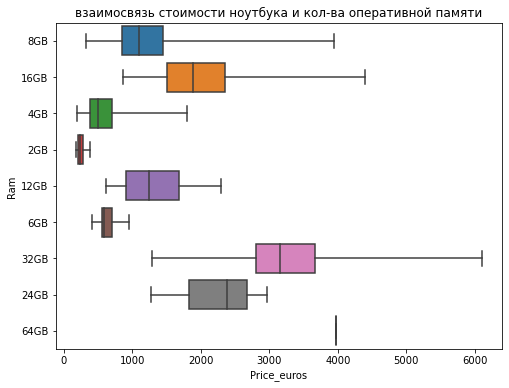

In [35]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = df['Price_euros'], y = df['Ram'], whis = 10)
plt.title('взаимосвязь стоимости ноутбука и кол-ва оперативной памяти');

4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

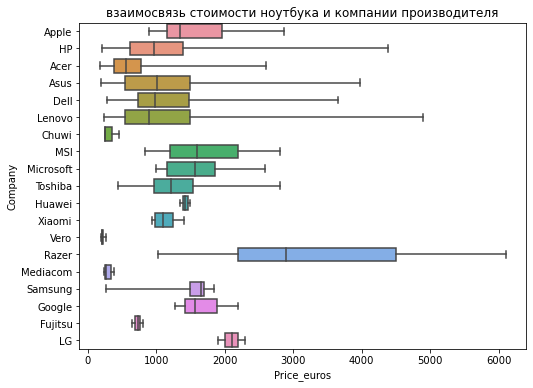

In [39]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = df['Price_euros'], y = df['Company'], whis = 10)
plt.title('взаимосвязь стоимости ноутбука и компании производителя');

# Задание 5
Постройте матрицу корреляций для таблицы


In [37]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1) #округление(тот параметр, который хотим округлять, 1 -знак после запятой)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 #берем значения по модулю (если попадаются отрицательные значения)
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.0,0.3
Weight,0.8,1.0,0.0,0.0
Price_euros,0.0,0.0,1.0,0.0
Memory_Amount,0.3,0.0,0.0,1.0


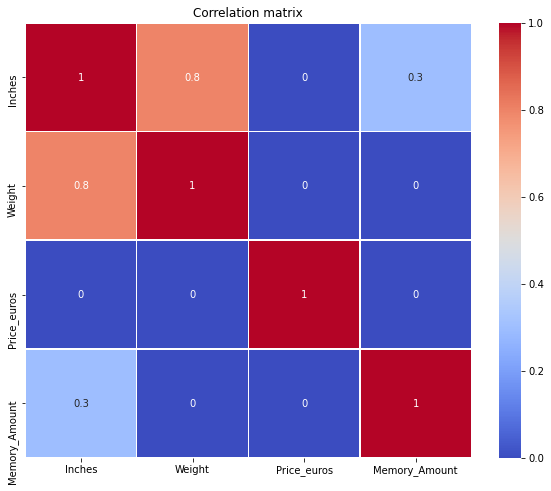

In [38]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');